In [1]:
from helpers import toWei, fromWei, Market

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Here are the market parameters. The rest of the notebook is designed so that if you change these parameters, the rest of the notebook should execute correctly.

For context, the Rinkeby faucet gives:
- 3 Ether with 8 hour wait
- ~19 Ether with a 3 day wait

In [2]:
params = {
    'price_floor_human':    1e-9, # ETH per CMT
    'spread':               200,
    'list_reward':          toWei(1, 'CMT'),
    'stake':                toWei(10, 'CMT'),
    'backend_payment':      5, # percent
    'maker_payment':        25, # percent
    # reserve payment:      100 - backend_payment - maker_payment
    'cost_per_byte':        toWei(1e-8, 'ETH'), # 1 ETH for 100MB
}

CREATOR_BLOCK_SIZE =       toWei(2000, 'CMT')
CREATOR_INITIAL_SUPPORT =  toWei(100, 'ETH')

In [3]:
# Convert human readable floor to units used by market codebase
params['price_floor'] = int(params['price_floor_human'] * 1e9) # wei per billion CMT-wei
params['reserve_payment'] = 100 - params['backend_payment'] - params['maker_payment']

Let's run a simple scenario

In [4]:
# (re)create a fresh market
m = Market(params)

m.market_total += CREATOR_BLOCK_SIZE
m.reserve += CREATOR_INITIAL_SUPPORT 

n_supports = 1000

support_prices = np.zeros(n_supports)
withdraw_prices = np.zeros(n_supports)
costs_to_match_creator = np.zeros(n_supports)
costs_to_stake = np.zeros(n_supports)

m.log()
for i in range(n_supports):
    m.support(0.5)
    
    support_prices[i] = m.get_human_support_price()
    withdraw_prices[i] = m.get_withdraw_price()
    
    costs_to_match_creator[i] = fromWei(CREATOR_BLOCK_SIZE, 'CMT') * m.get_human_support_price()
    costs_to_stake[i] = fromWei(params['stake'], 'CMT') * m.get_human_support_price()

m.log()
# for i in range(510):
#     m.withdraw(10)
# m.log()

2000.0 CMT
100.0 ETH
Support at 0.1 ETH per CMT
Withdraw at 0.05 ETH per CMT

4901.5 CMT
600.0 ETH
Support at 0.2448 ETH per CMT
Withdraw at 0.1224 ETH per CMT



Creator pays 0.05 ETH/CMT


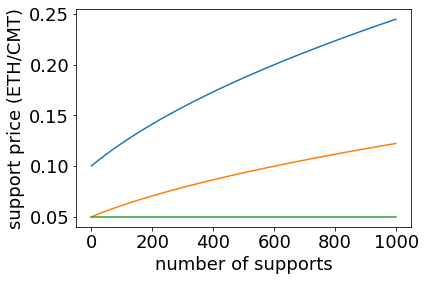

In [5]:
creator_price = CREATOR_INITIAL_SUPPORT/CREATOR_BLOCK_SIZE
creator_prices = np.full(n_supports, creator_price)
print(f"Creator pays {creator_price} ETH/CMT")

plt.rc('font', size=18)
fig, ax = plt.subplots()

x = np.arange(0, n_supports, 1)
ax.plot(x, support_prices)
ax.plot(x, withdraw_prices)
ax.plot(x, creator_prices)

ax.set(xlabel='number of supports', ylabel='support price (ETH/CMT)')
plt.show()

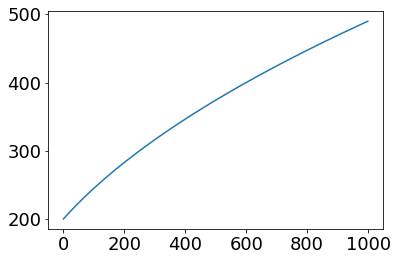

In [6]:
fig, ax = plt.subplots()
ax.plot(x, costs_to_match_creator)
plt.show()

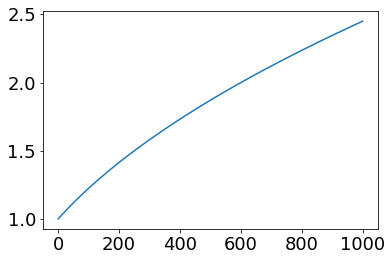

In [7]:
fig, ax = plt.subplots()
ax.plot(x, costs_to_stake)
plt.show()